### Imports

In [35]:
import matplotlib.pyplot as plt

### Data 

In [36]:
from dataProcessor import *

### Model

In [2]:
from P3Classifier import *
from CollaborativeFiltering import *

### P3Classifier Analysis

In [39]:
dim = 5
cv = 5
epoch = 100
lr = 0.01
datapath = "/media/zzhuang/00091EA2000FB1D0/iGit/git_projects/RecommendML/data"
filename = "movie_ratings_nudged"
figpath = ""

----------------------CV 1-----------------------
Baseline: untrained model Avg Loss: 13.264581


HBox(children=(IntProgress(value=0), HTML(value='')))


Validation Performance: Avg Loss 1.399104


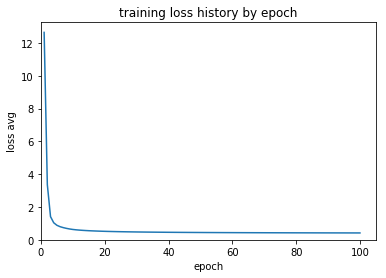

----------------------CV 2-----------------------
Baseline: untrained model Avg Loss: 13.386309


HBox(children=(IntProgress(value=0), HTML(value='')))


Validation Performance: Avg Loss 1.497973


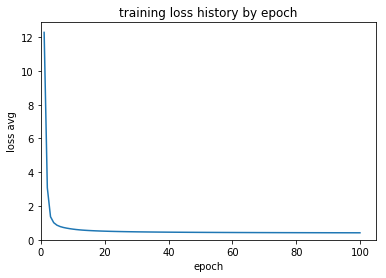

----------------------CV 3-----------------------
Baseline: untrained model Avg Loss: 13.339704


HBox(children=(IntProgress(value=0), HTML(value='')))


Validation Performance: Avg Loss 1.444538


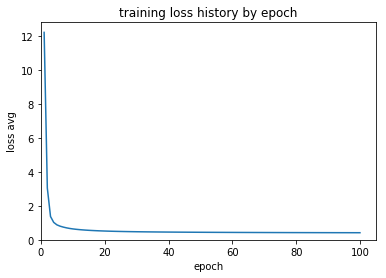

----------------------CV 4-----------------------
Baseline: untrained model Avg Loss: 13.428610


HBox(children=(IntProgress(value=0), HTML(value='')))


Validation Performance: Avg Loss 1.438121


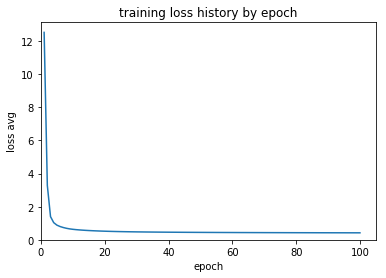

----------------------CV 5-----------------------
Baseline: untrained model Avg Loss: 13.319560


HBox(children=(IntProgress(value=0), HTML(value='')))


Validation Performance: Avg Loss 1.410968


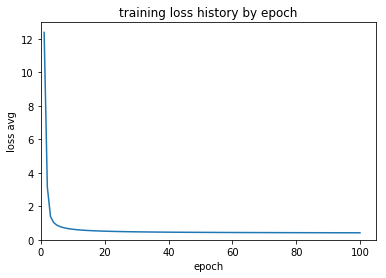

----------------------summary-----------------------
CV loss avg list: [1.3991037832319067, 1.4979730106818414, 1.4445376606548341, 1.4381211206609557, 1.4109681764397275]


In [40]:
data_loader = CVdataloader(cv, datapath, filename)
loss_avg_list = []
for cvRound, (trainData, validData) in enumerate(data_loader):
    model = P3Classifier(dim, data_loader.userNum, data_loader.movieNum, epoch, lr)
    
    print("----------------------CV %d-----------------------" % (cvRound+1))
    print("Baseline: untrained model Avg Loss: %f" % (model.evaluate(validData)))
    loss_history = model.train(trainData)
    loss_avg_list.append(model.evaluate(validData))
    print("Validation Performance: Avg Loss %f" % loss_avg_list[-1])
    plt.plot(range(1, 1+len(loss_history)), loss_history)
    plt.xlabel("epoch")
    plt.xlim(xmin=0)
    plt.ylabel("loss avg")
    plt.ylim(ymin=0)
    plt.title("training loss history by epoch")
    plt.show()

print("----------------------summary-----------------------" )
print("CV loss avg list:", loss_avg_list)

### Collaborative Filtering

In [11]:
dim = 5
cv = 5
datapath = "/media/zzhuang/00091EA2000FB1D0/iGit/git_projects/RecommendML/data"
filename = "movie_ratings_nudged"

In [13]:
data_loader = CVdataloader(cv, datapath, filename)
loss_avg_list = []
for cvRound, (trainData, validData) in enumerate(data_loader):
    model = CollaborativeFiltering(k=dim)
    
    print("----------------------CV %d-----------------------" % (cvRound+1))
    print("Baseline: untrained model Avg Loss: %f" % (model.evaluate(validData)))
    rec.train("data/movie_ratings.csv")
    loss_avg_list.append(model.evaluate(validData))
    print("Validation Performance: Avg Loss %f" % loss_avg_list[-1])

print("----------------------summary-----------------------" )
print("CV loss avg list:", loss_avg_list)

----------------------CV 1-----------------------


TypeError: 'NoneType' object is not subscriptable